# Assessing the Potential Integration of UK Biobank Diffusion MRI Data into ENIGMA Studies

Alyssa H. Zhu$^{1,2}$, Andrew M. McIntosh$^{3}$, Paul M. Thompson$^{1,2}$, Neda Jahanshad$^{1,2}$ 

$^{1}$Imaging Genetics Center, Stevens Neuroimaging and Informatics Institute, USC, Marina del Rey, CA
$^{2}$Department of Biomedical Engineering, USC, Los Angeles, CA
$^{3}$Division of Psychiatry, University of Edinburgh, Royal Edinburgh Hospital, Edinburgh, U.K.

contact email: alyssahz@usc.edu

### Introduction

The UK Biobank is a large single site study that began with the collection of biological samples and clinical history from more than 500,000 people around the United Kingdom from 2006-2010. Participants were asked to return for an imaging visit, including brain MRI, starting in 2014. The imaging data from over 10,000 subjects has been analyzed by UKB team using standard methods [1], and the images and imaging data phenotypes (IDPs) are available to research laboratories that apply for access to the data. 

Due to the broad inclusion criteria for subject selection, data from the UK Biobank may prove useful in increasing the sample sizes for various studies, by combining it with other data. However, combining data from different scanners and processing pipelines is a non-trivial problem important to establish for future studies. The feasibility of integrating the UK Biobank data into Enhancing NeuroImaging Genetics through Meta Analysis (ENIGMA) studies is assessed here. 

### Methods

The raw and processed diffusion images of 447 subjects were downloaded. Subjects were between 46 to 73 years old, including 209 women. For our study, subjects were intentionally not screened to exclude neurological conditions as we aimed purely to assess methodological agreement, and we wanted to ensure there was no bias in terms of patient demographics.

Images were re-processed using the ENIGMA diffusion processing pipeline [2]. The diffusion measures analyzed in this study were fractional anisotropy (FA), mean diffusivity (MD), axial diffusivity (AD), radial diffusivity (RD), intracellular volume fraction (ICVF), and isotropic volume fraction (ISOVF). The two major differences between the pipelines were the use of ANTS [3] for non-linear registration and the ENIGMA template. Ordinary least squares models were fitted for every region of interest (ROI) of the Johns Hopkins University’s (JHU) ICBM-DTI-81 white-matter labels atlas [4], with metrics derived from the ENIGMA skeleton as the predictor and the UK Biobank derived metrics as the response. The fits were forced through the origin. The goodness of the fit was assessed using the coefficient of determination (R-squared). [All regression models](#ols) can be found below.

### Results

Despite the quality control (QC) already performed by the UK Biobank, three subjects were additionally dropped from the analysis, one because of a (PA) image acquired with an incomplete field of view and two because of bad FNIRT registrations, leaving 444 subjects for analysis. 

Most ROIs showed good correspondence between the two processing pipelines, though the corticospinal tract (CST), the fornix (FX), superior fronto-occipital fasciculus (SFO), and uncinate (UNC) were often inconsistent. The fornix/stria terminalis (FX/ST) was notable for its large range of R-squared values (0.19-0.95). ICVF and MD were the most consistent diffusion metrics (average R-squared values of 0.89 and 0.82 respectively), whereas FA and ISOVF were the least (average R-squared values of 0.78 and 0.76 respectively). All results can be found by clicking any of the links in the "Full Results Table of Contents" below.

####  Full Results Table of Contents

* [R-squared between ENIGMA-atlas and UKB IDPs: ROI-by-metric Table](#tables)
* [R-squared between ENIGMA-atlas and UKB IDPs: Histograms per diffusion metric](#hist)
* [UKB vs. ENIGMA-atlas IDPs: Regional Scatter Plots](#scatter)
    * [FA](#sfa)
    * [MD](#smd)
    * [AD](#sad)
    * [RD](#srd)
    * [ICVF](#sicvf)
    * [ISOVF](#sisovf)
* [UKB vs. ENIGMA-atlas IDPs: Regional Bland-Altman Plots](#ba)
    * [FA](#bafa)
    * [MD](#bamd)
    * [AD](#baad)
    * [RD](#bard)
    * [ICVF](#baicvf)
    * [ISOVF](#baisovf)
    

### Discussion

The ROIs that consistently had low R-squared values are in areas that are susceptible to partial voluming effects (juxtacortical or periventricular) and/or registration errors—the JHU atlas only considers the portion of the CST that is inferior to the thalamus.

These preliminary results indicate that reprocessing the diffusion images may not be necessary, depending on the ROI and diffusion metric of interest.

#### References

[1] K. L. Miller, et al. Multimodal population brain imaging in the UK Biobank prospective epidemiological study. Nat Neurosci 2016 Nov; 19(11): 1523-1536.

[2] N. Jahanshad, et al. Multi-site genetic analysis of diffusion images and voxelwise heritability analysis: a pilot project of the ENIGMA-DTI working group. NeuroImage 2013; 81: 455-69.

[3] B. B. Avants, N. J. Tustison, G. Song, P.A. Cook, A. Klein, J. C. Gee. A reproducible evaluation of ANTs similarity metric performance in brain registration. NeuroImage 2011; 54(3): 2033-44.

[4] S. Mori, et al. Stereotaxic white matter atlas based on diffusion tensor imaging in an ICBM template. NeuroImage 2008 Apr 1; 40(2): 570-82.

#### Acknowledgments 

This research has been conducted using the UK Biobank Resource under Application Number ‘11559’.

NIH Big Data to Knowledge program: ENIGMA Center U54EB020403 (PI: Thompson).

Michael J. Fox Foundation Grant 14848 (PI: Jahanshad).

In [1]:
import pandas as pd
import statsmodels.formula.api as sfm
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

### Define Functions

In [2]:
def sfmols(indvar, depvars, dataframe, const=1):
    
    """
    
    Runs statsmodels.formula.api.ols and removes outliers as determined by the 
    third standard deviation of the residual distribution.
    
    Inputs
    
        indvar:    Column name of independent variable
        
        depvars:   List of column names corresponding to dependent variables
        
        dataframe: Dataframe that contains column names of indvar and depvars
        
        const:     Set to 1 to add constant to independent variable matrix
                   Set to 0 if the model intercept should be zero
                   (Default: 1)
    
    
    Outputs
    
        results:  Default output of statsmodels.formula.api.ols
        
        man_rsq:  re-calculated R-squared since statsmodels.formula.api.ols 
                  over-estimates the R-squared when a constant is 
                  not present in the model
        
        excludes: the indices of the outliers that were excluded
    
    """
    
    # Set up dataframe
    
    df = dataframe.dropna(subset=[indvar]+depvars)
    
    # Set up formula
    
    formula = 'Q("%s") ~ ' %str(indvar)
    for i, dv in enumerate(depvars):
        if i == 0:
            formula += 'Q("%s")' %str(dv)
        else:
            formula += ' + Q("%s")' %str(dv)
    if const != 1:
        formula += ' - 1'
        
    # Run Model 1st Time

    model = sfm.ols(formula, data=df)
    results = model.fit()
    
    # Filter by Residuals/STD
    m = np.nanmean(results.resid)
    s = np.nanstd(results.resid)
    excludes = results.resid[(results.resid >= (m+3*s)) | (results.resid <= m-3*s)].keys()

    df.drop(excludes, inplace=True)
    
    # Run Model Again
    model = sfm.ols(formula, data=df)
    results = model.fit()
    
    y = df[indvar]
    man_rsq = 1-sum((results.resid)**2)/sum((y-np.mean(y))**2)
    
    return results, man_rsq, excludes

In [3]:
def highlight_mins(s, thr=0.6):
    '''
    Change font color of the values below the threshold to red
    '''
    if not isinstance(s[0],str):
        srtd = sorted(s)
        return ['color: red' if (v < thr) else '' for v in s] 
    else:
        return [""]*len(s)

In [4]:
def bland_altman(x,y, ax=None, *args, **kwargs):
    x = np.array(x)
    y = np.array(y)
 
    mean = np.mean([x,y],axis=0)
    diff = x - y
    md = np.nanmean(diff)
    sd = np.nanstd(diff, axis=0)
 
    if ax is None:
        ax = plt.gca()
    ba = ax.scatter(mean, diff, *args, **kwargs)
    ax.axhline(md, color='gray', linestyle='--')
    ax.axhline(md + 1.96*sd, color='gray', linestyle='--')
    ax.axhline(md - 1.96*sd, color='gray', linestyle='--')
    return ba, diff

### Load Data

Please note that the ENIGMA pipeline data is not available online. The UK Biobank (UKB) data was acquired as part of the data release; however the column names here reflect the region of interest (ROI) names rather than the datafield numbers.

In [5]:
enigma = {}
ukbb = {}
metrics = ["fa", "md", "ad", "rd", "icvf", "isovf"]

for m in metrics:
    enigma[m] = pd.read_csv("../../results/%s_data.csv" %m) 
    ukbb[m] = pd.read_csv("../../ukbb_skeleton_%s.csv" %m) 

In [6]:
combined = {}

for m in metrics:
    combined[m] = enigma[m].merge(ukbb[m], on="eid", suffixes=('_enigma', '_ukbb'))

### Removing QC Fails

Here we remove QC Fails as determined by visual inspection. QC Fails were either due to either an incomplate scan acquisition or a bad FNIRT registration (UKB). Please note that these identifiers are unique to each UKB application.

In [7]:
for m in metrics:
    combined[m] = combined[m][~combined[m]['eid'].isin(['5584535_20250_2_0', '4056276_20250_2_0', '4304189_20250_2_0'])]

### OLS Regressions <a class="anchor" name="ols"></a>

For the purposes of this report, all bilateral ROIs were averaged, and only the bilateral average was analyzed. All regressions are run such that the intercept is zero.

In [8]:
results = {}
bad = {}

for m in metrics:
    for c in combined[m].columns[1:]:
        if ("-R" in c) or ("_ukbb" in c):
            continue
        elif "-L" in c:
            roi = c.replace("-L", "")
            r_roi = c.replace("-L", "-R")
            ukb_roi = roi.replace("_enigma", "_ukbb")
            l_ukb_roi = c.replace("_enigma", "_ukbb")
            r_ukb_roi = r_roi.replace("_enigma", "_ukbb")
            combined[m][roi] = (combined[m][c]+combined[m][r_roi])/2.0
            combined[m][ukb_roi] = (combined[m][l_ukb_roi]+combined[m][r_ukb_roi])/2.0
            rs, man_rsq, excludes = sfmols(ukb_roi, [roi], combined[m], const=0)
        else:
            ukb_roi = c.replace("_enigma", "_ukbb")
            rs, man_rsq, excludes = sfmols(ukb_roi, [c], combined[m], const=0)
        
        ROI = ukb_roi.split("_")[0]
        if ROI not in results.keys():
            results[ROI] = {m.upper(): man_rsq}
        else:
            results[ROI][m.upper()] = man_rsq
            
rs_df = pd.DataFrame.from_dict(results, orient="index")
rs_df = rs_df[['FA', 'MD', 'AD', 'RD', 'ICVF', 'ISOVF']]

In [34]:
rs_df['AVG'] = np.nanmean(rs_df, axis=1)

<a class="anchor" name="tables"></a>

##### Table 1. R-squared values for all ROIs and diffusion measures. ROIs are ordered by average R-squared in descending order. R-squared values below 0.6 are colored red. This visually demonstrates that the diffusion measures of certain ROIs are less consistent between the two processing pipelines.

In [36]:
rs_df.sort_values(by="AVG", ascending=False).round(3).style.apply(highlight_mins)

In [37]:
rs_df['min'] = np.amin(rs_df, axis=1)
rs_df['max'] = np.amax(rs_df, axis=1)

##### Table 2. Minimum and maximum R-squared columns have been added for each ROI. Of particular note is FX/ST, which has an R-squared range of 0.191-0.945 across diffusion metrics. Most ROIs have a smaller range as is demonstrated by the histogram in Figure 2.

In [38]:
rs_df.sort_values(by="AVG", ascending=False).round(3).style.apply(highlight_mins)

In [49]:
print "metric\taverage R-sq"

for c in rs_df.columns[:6]:
    print "%s\t%0.3f" %(c, np.nanmean(rs_df[c]))

metric	average R-sq
FA	0.781
MD	0.824
AD	0.805
RD	0.810
ICVF	0.893
ISOVF	0.765


### R-squared Histograms <a class="anchor" name="hist"></a>



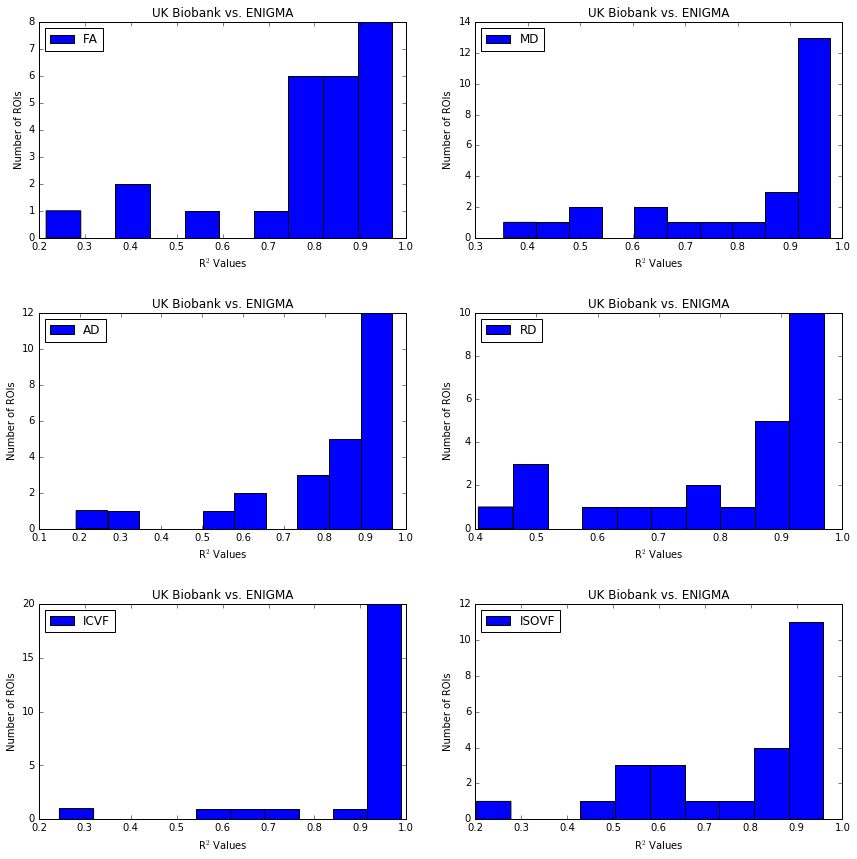

In [10]:
plt.figure(figsize=(12,12))

for i,m in enumerate(metrics):
    m = m.upper()
    plt.subplot(3,2,i+1)
    plt.hist(rs_df["%s" %m])
    plt.title("UK Biobank vs. ENIGMA")
    plt.legend(["%s" %m], loc="upper left")
    plt.xlabel("R$^2$ Values")
    plt.ylabel("Number of ROIs")

plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

##### Figure 1. Histograms of the R-squared values for all ROIs for each given diffusion metric.

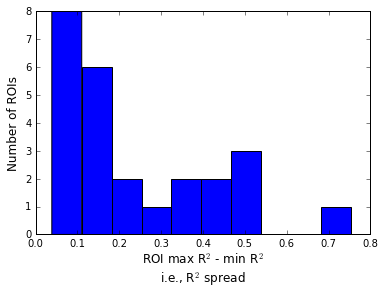

In [43]:
plt.hist(rs_df["max"]-rs_df["min"])
plt.xlabel("ROI max R$^2$ - min R$^2$\ni.e., R$^2$ spread", fontsize=12)
plt.ylabel("Number of ROIs", fontsize=12)
plt.show()

##### Figure 2. A histogram of the R-squared spread across the diffusion metrics (highest R-squared - lowest R-squared) for each ROI.

### Scatter Plots <a class="anchor" name="scatter"></a>

All plots are set such that the axes of each subplot is the same. Subplots are arranged in alphabetical order by ROI name.

#### FA<a class="anchor" name="sfa"></a>

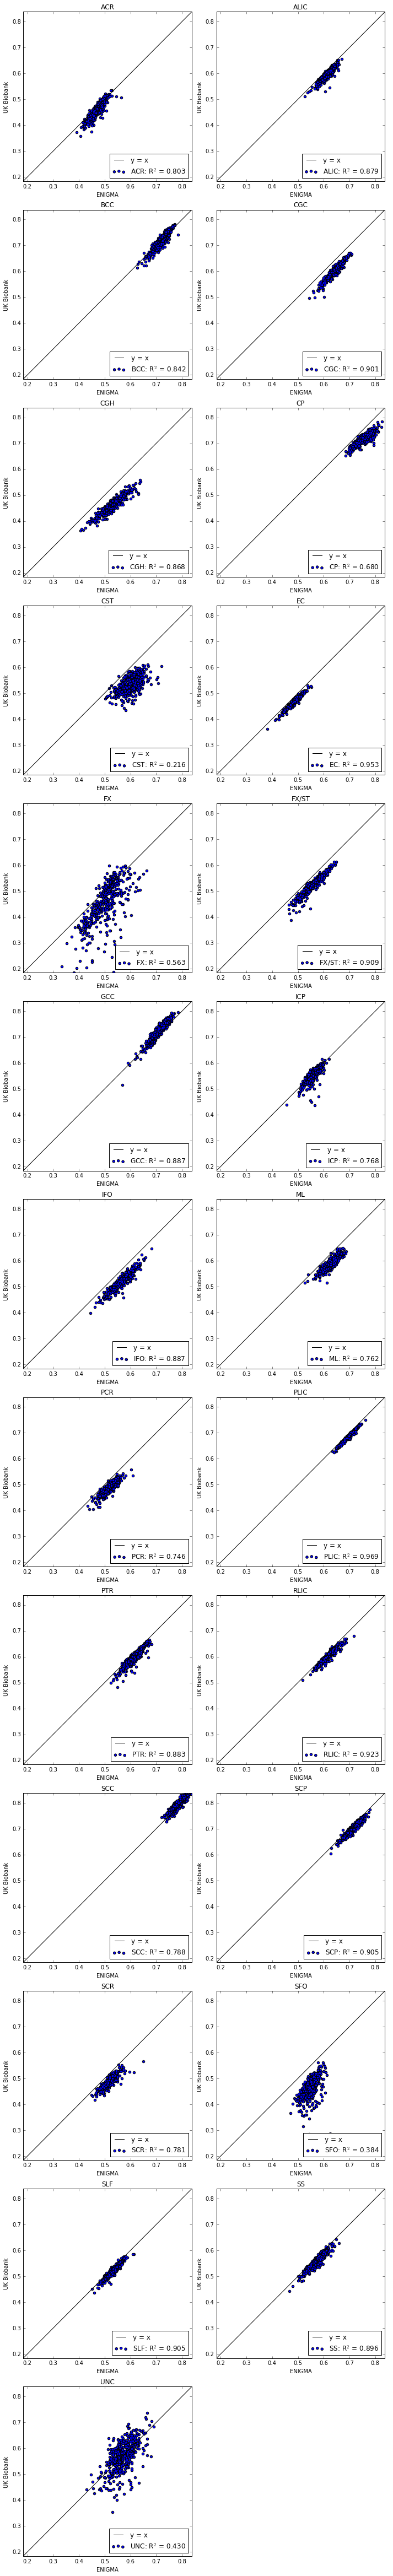

In [11]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    

lwrbnd = np.amin(np.amin(combined['fa']))
uprbnd = np.amax(np.amax(combined['fa'])[1:])

fig, axes = plt.subplots(nrows, 2, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    ax[i].scatter(combined['fa'][roi+"_enigma"], combined['fa'][roi+"_ukbb"])
    ax[i].plot([lwrbnd, uprbnd],[lwrbnd, uprbnd],"k-")
    ax[i].set_xlabel("ENIGMA")
    ax[i].set_ylabel("UK Biobank")
    ax[i].set_title(roi)
    ax[i].set_xlim([lwrbnd, uprbnd])
    ax[i].set_ylim([lwrbnd, uprbnd])
    ax[i].legend(["y = x", "%s: R$^2$ = %.3f" %(roi, rs_df.loc[roi,'FA'])], loc="lower right")

if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()

#### MD<a class="anchor" name="smd"></a>

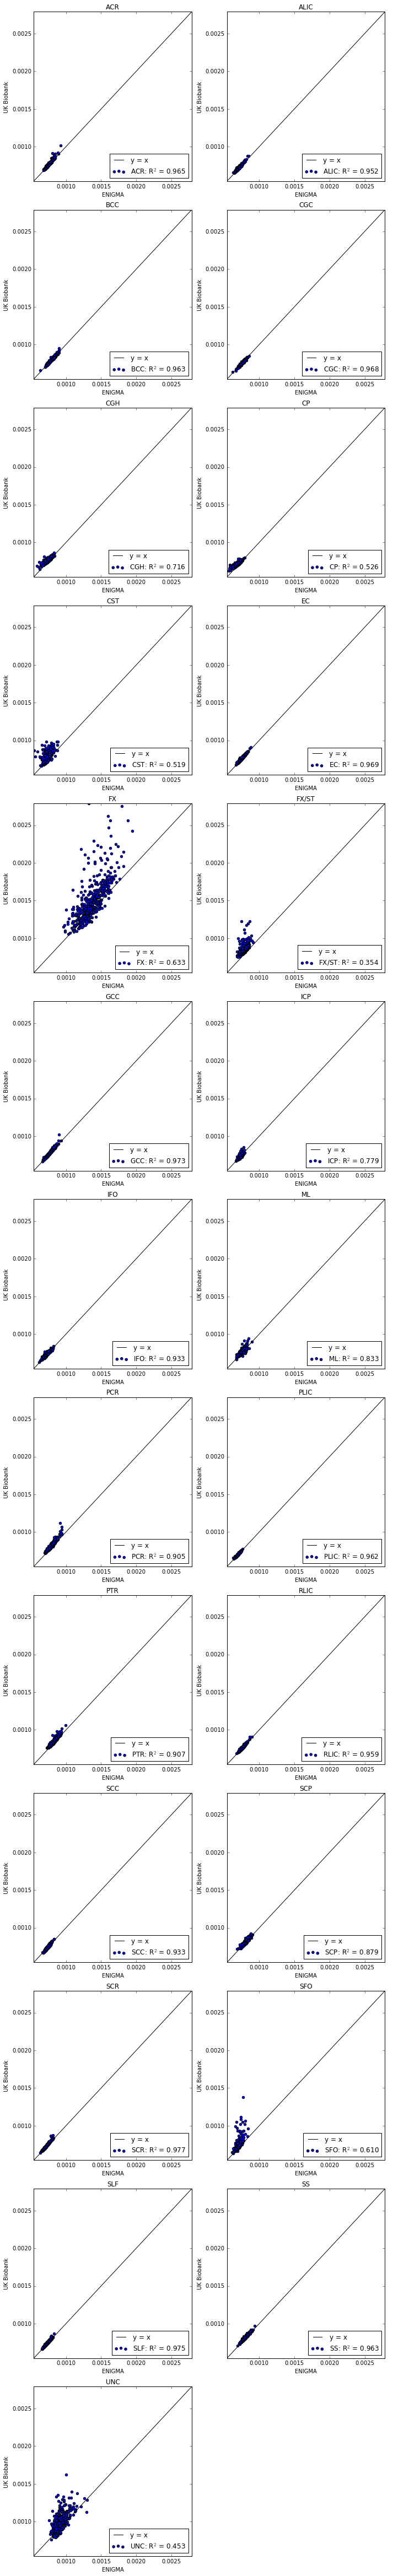

In [12]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "md"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])

fig, axes = plt.subplots(nrows, 2, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    ax[i].scatter(combined[m][roi+"_enigma"], combined[m][roi+"_ukbb"])
    ax[i].plot([lwrbnd, uprbnd],[lwrbnd, uprbnd],"k-")
    ax[i].set_xlabel("ENIGMA")
    ax[i].set_ylabel("UK Biobank")
    ax[i].set_title(roi)
    ax[i].set_xlim([lwrbnd, uprbnd])
    ax[i].set_ylim([lwrbnd, uprbnd])
    ax[i].legend(["y = x", "%s: R$^2$ = %.3f" %(roi, rs_df.loc[roi,m.upper()])], loc="lower right")

if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()

#### AD<a class="anchor" name="sad"></a>

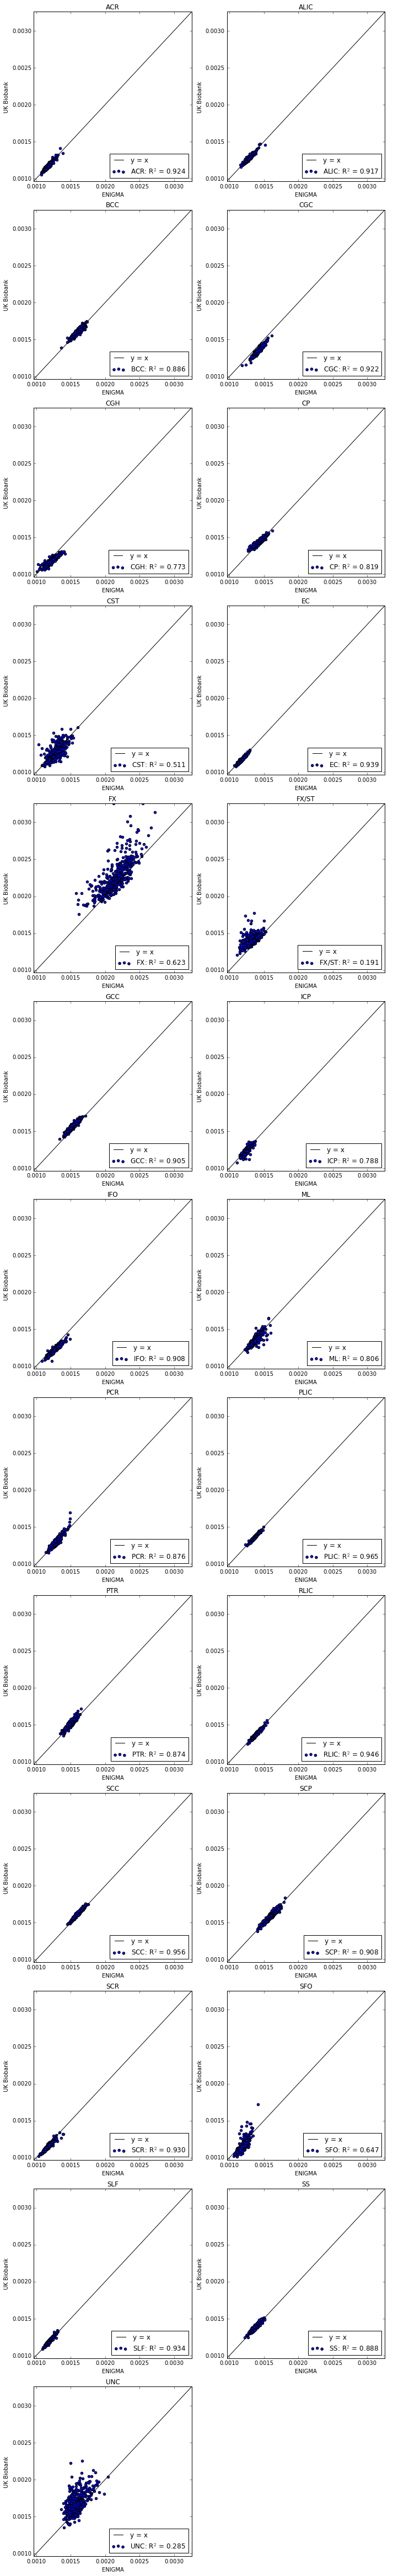

In [13]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "ad"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])

fig, axes = plt.subplots(nrows, 2, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    ax[i].scatter(combined[m][roi+"_enigma"], combined[m][roi+"_ukbb"])
    ax[i].plot([lwrbnd, uprbnd],[lwrbnd, uprbnd],"k-")
    ax[i].set_xlabel("ENIGMA")
    ax[i].set_ylabel("UK Biobank")
    ax[i].set_title(roi)
    ax[i].set_xlim([lwrbnd, uprbnd])
    ax[i].set_ylim([lwrbnd, uprbnd])
    ax[i].legend(["y = x", "%s: R$^2$ = %.3f" %(roi, rs_df.loc[roi,m.upper()])], loc="lower right")

if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()

#### RD<a class="anchor" name="srd"></a>

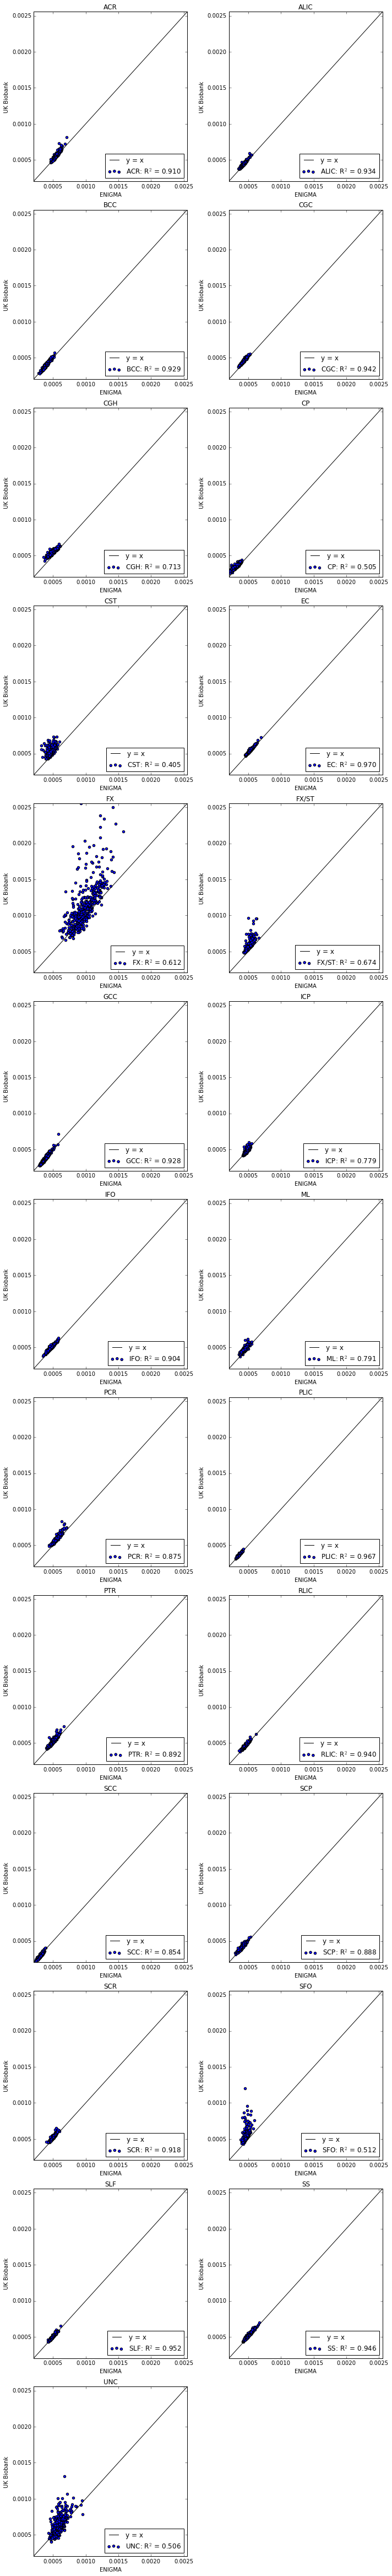

In [14]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "rd"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])

fig, axes = plt.subplots(nrows, 2, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    ax[i].scatter(combined[m][roi+"_enigma"], combined[m][roi+"_ukbb"])
    ax[i].plot([lwrbnd, uprbnd],[lwrbnd, uprbnd],"k-")
    ax[i].set_xlabel("ENIGMA")
    ax[i].set_ylabel("UK Biobank")
    ax[i].set_title(roi)
    ax[i].set_xlim([lwrbnd, uprbnd])
    ax[i].set_ylim([lwrbnd, uprbnd])
    ax[i].legend(["y = x", "%s: R$^2$ = %.3f" %(roi, rs_df.loc[roi,m.upper()])], loc="lower right")

if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()

#### ICVF<a class="anchor" name="sicvf"></a>

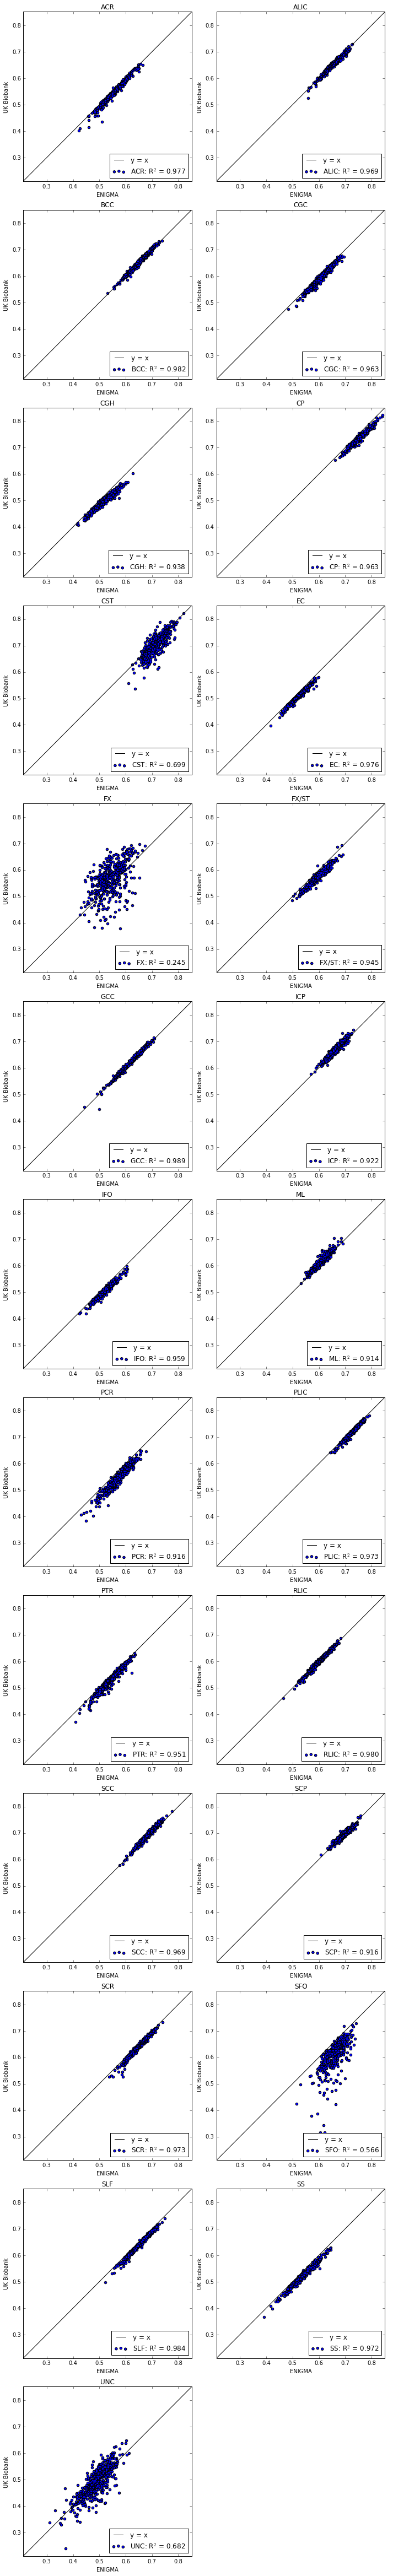

In [15]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "icvf"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])

fig, axes = plt.subplots(nrows, 2, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    ax[i].scatter(combined[m][roi+"_enigma"], combined[m][roi+"_ukbb"])
    ax[i].plot([lwrbnd, uprbnd],[lwrbnd, uprbnd],"k-")
    ax[i].set_xlabel("ENIGMA")
    ax[i].set_ylabel("UK Biobank")
    ax[i].set_title(roi)
    ax[i].set_xlim([lwrbnd, uprbnd])
    ax[i].set_ylim([lwrbnd, uprbnd])
    ax[i].legend(["y = x", "%s: R$^2$ = %.3f" %(roi, rs_df.loc[roi,m.upper()])], loc="lower right")

if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()

#### ISOVF<a class="anchor" name="sisovf"></a>

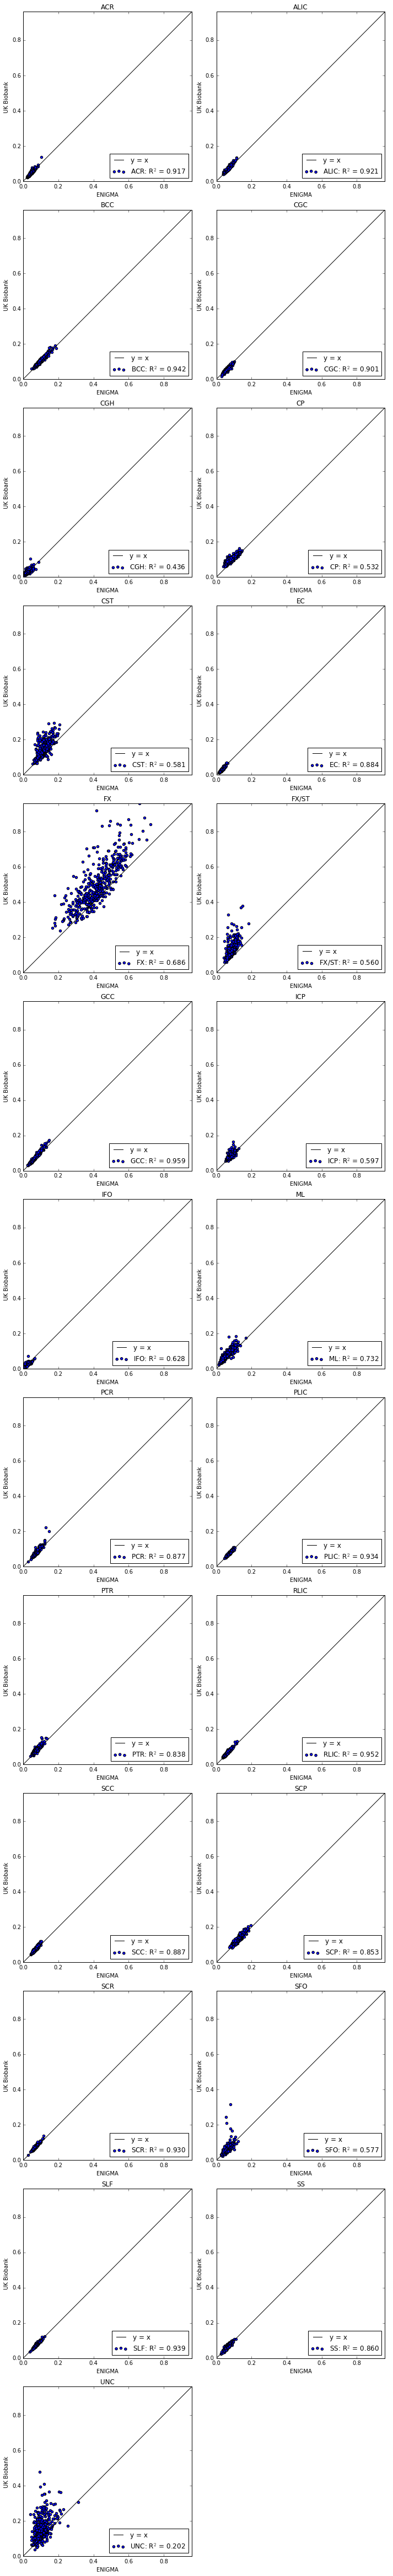

In [16]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "isovf"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])

fig, axes = plt.subplots(nrows, 2, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    ax[i].scatter(combined[m][roi+"_enigma"], combined[m][roi+"_ukbb"])
    ax[i].plot([lwrbnd, uprbnd],[lwrbnd, uprbnd],"k-")
    ax[i].set_xlabel("ENIGMA")
    ax[i].set_ylabel("UK Biobank")
    ax[i].set_title(roi)
    ax[i].set_xlim([lwrbnd, uprbnd])
    ax[i].set_ylim([lwrbnd, uprbnd])
    ax[i].legend(["y = x", "%s: R$^2$ = %.3f" %(roi, rs_df.loc[roi,m.upper()])], loc="lower right")

if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()

### Bland Altman plots<a class="anchor" name="ba"></a>

All plots are set such that the axes of each subplot is the same. Subplots are arranged in alphabetical order by ROI name.

#### FA<a class="anchor" name="bafa"></a>

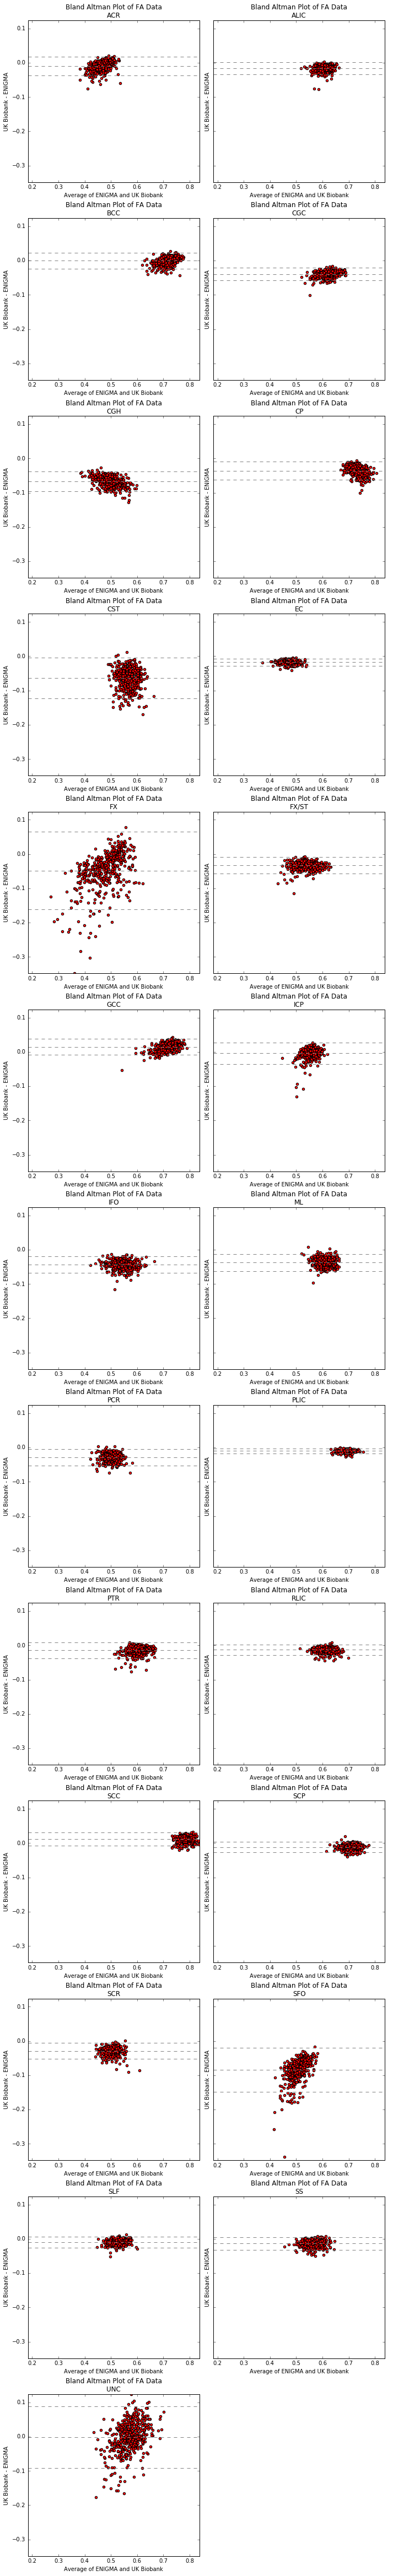

In [17]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "fa"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])
lwrybnds = []
uprybnds = []

fig, axes = plt.subplots(nrows, 2, sharey=True, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    baplot, coldiff = bland_altman(combined[m][roi+'_ukbb'], combined[m][roi+'_enigma'], 
                                   ax[i], color='red', edgecolor='black')
    ax[i].set_xlim([lwrbnd, uprbnd])
    lwrybnds.append(np.amin(coldiff))
    uprybnds.append(np.amax(coldiff))
    ax[i].set_ylabel('UK Biobank - ENIGMA')
    ax[i].set_xlabel('Average of ENIGMA and UK Biobank')
    ax[i].set_title('Bland Altman Plot of %s Data\n%s' %(m.upper(), roi))

for a in ax:
    a.set_ylim([np.amin(lwrybnds), np.amax(uprybnds)])
    
if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()
plt.close(fig)

#### MD <a class="anchor" name="bamd"></a>

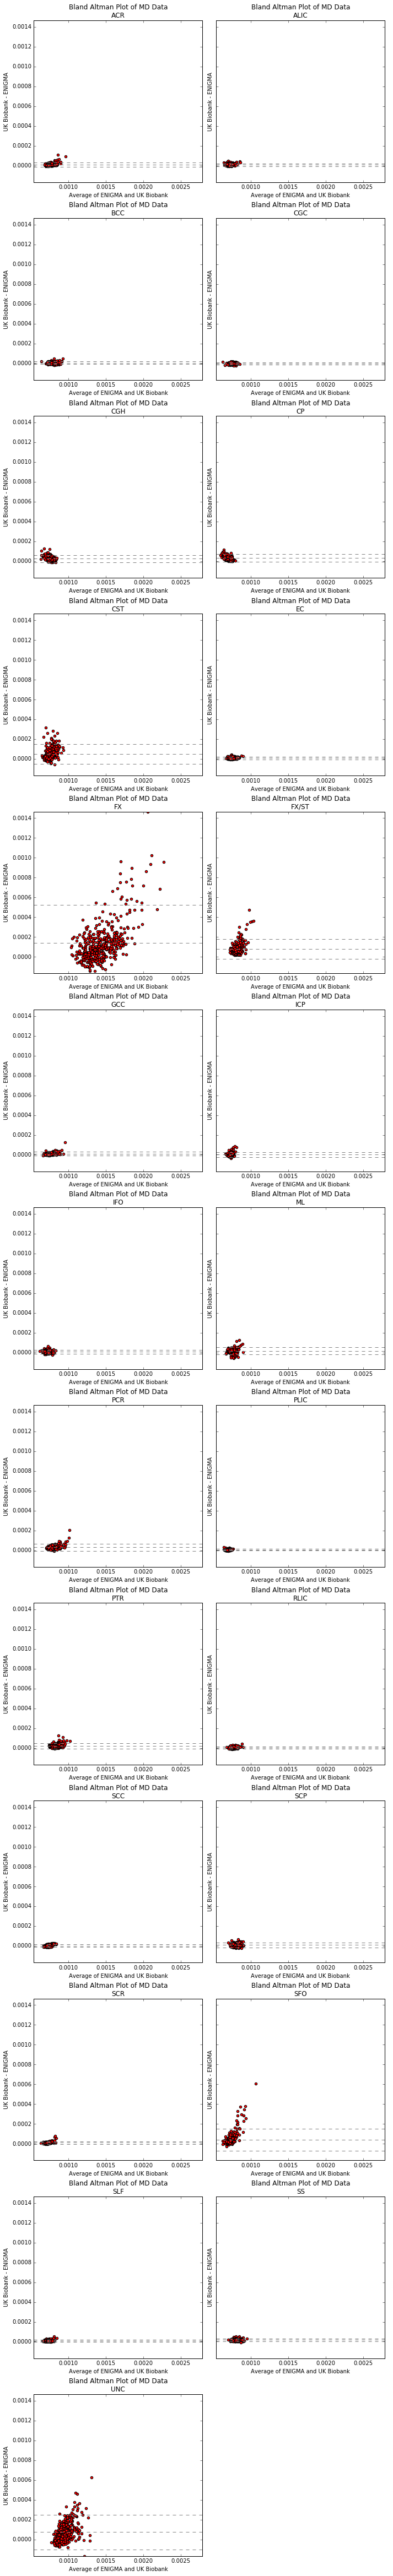

In [18]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "md"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])
lwrybnds = []
uprybnds = []

fig, axes = plt.subplots(nrows, 2, sharey=True, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    baplot, coldiff = bland_altman(combined[m][roi+'_ukbb'], combined[m][roi+'_enigma'], 
                                   ax[i], color='red', edgecolor='black')
    ax[i].set_xlim([lwrbnd, uprbnd])
    lwrybnds.append(np.amin(coldiff))
    uprybnds.append(np.amax(coldiff))
    ax[i].set_ylabel('UK Biobank - ENIGMA')
    ax[i].set_xlabel('Average of ENIGMA and UK Biobank')
    ax[i].set_title('Bland Altman Plot of %s Data\n%s' %(m.upper(), roi))

for a in ax:
    a.set_ylim([np.amin(lwrybnds), np.amax(uprybnds)])
    
if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()
plt.close(fig)

#### AD <a class="anchor" name="baad"></a>

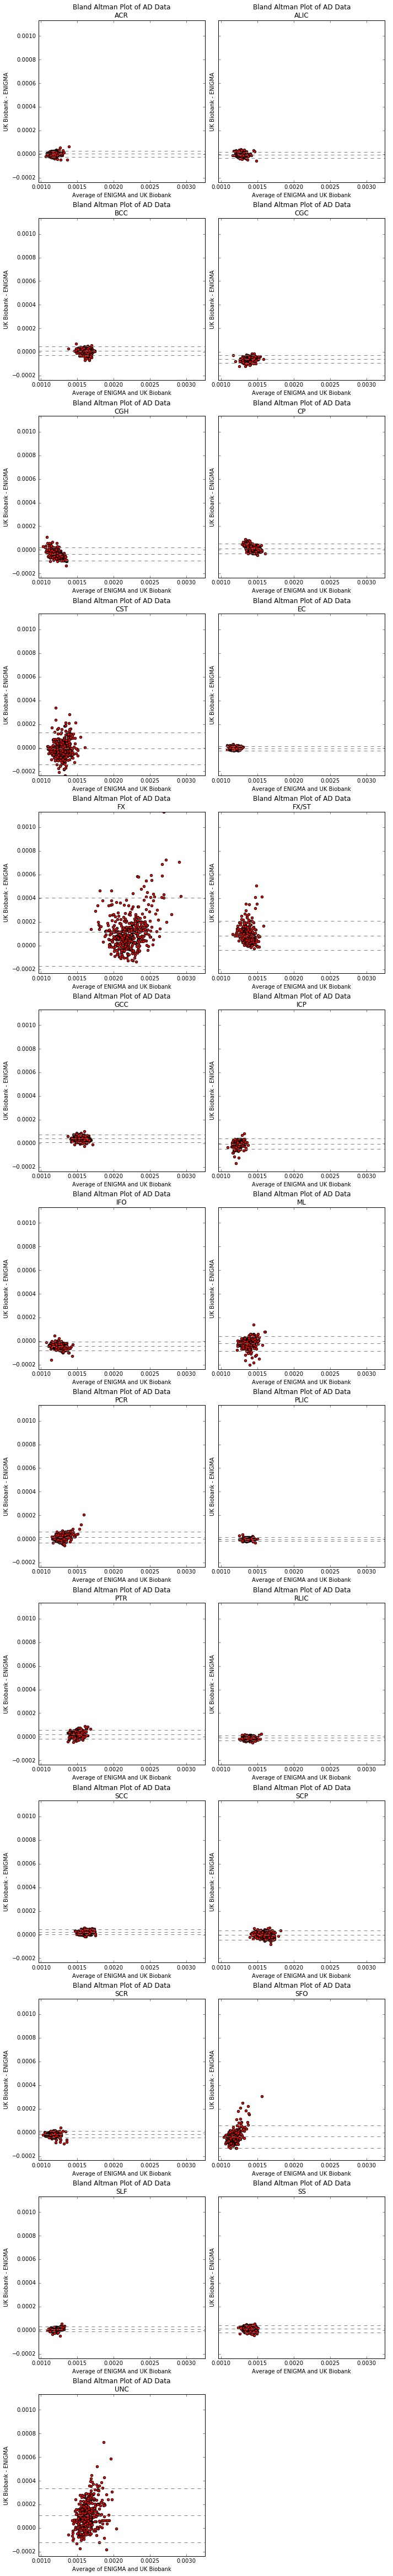

In [19]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "ad"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])
lwrybnds = []
uprybnds = []

fig, axes = plt.subplots(nrows, 2, sharey=True, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    baplot, coldiff = bland_altman(combined[m][roi+'_ukbb'], combined[m][roi+'_enigma'], 
                                   ax[i], color='red', edgecolor='black')
    ax[i].set_xlim([lwrbnd, uprbnd])
    lwrybnds.append(np.amin(coldiff))
    uprybnds.append(np.amax(coldiff))
    ax[i].set_ylabel('UK Biobank - ENIGMA')
    ax[i].set_xlabel('Average of ENIGMA and UK Biobank')
    ax[i].set_title('Bland Altman Plot of %s Data\n%s' %(m.upper(), roi))

for a in ax:
    a.set_ylim([np.amin(lwrybnds), np.amax(uprybnds)])
    
if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()
plt.close(fig)

#### RD <a class="anchor" name="bard"></a>

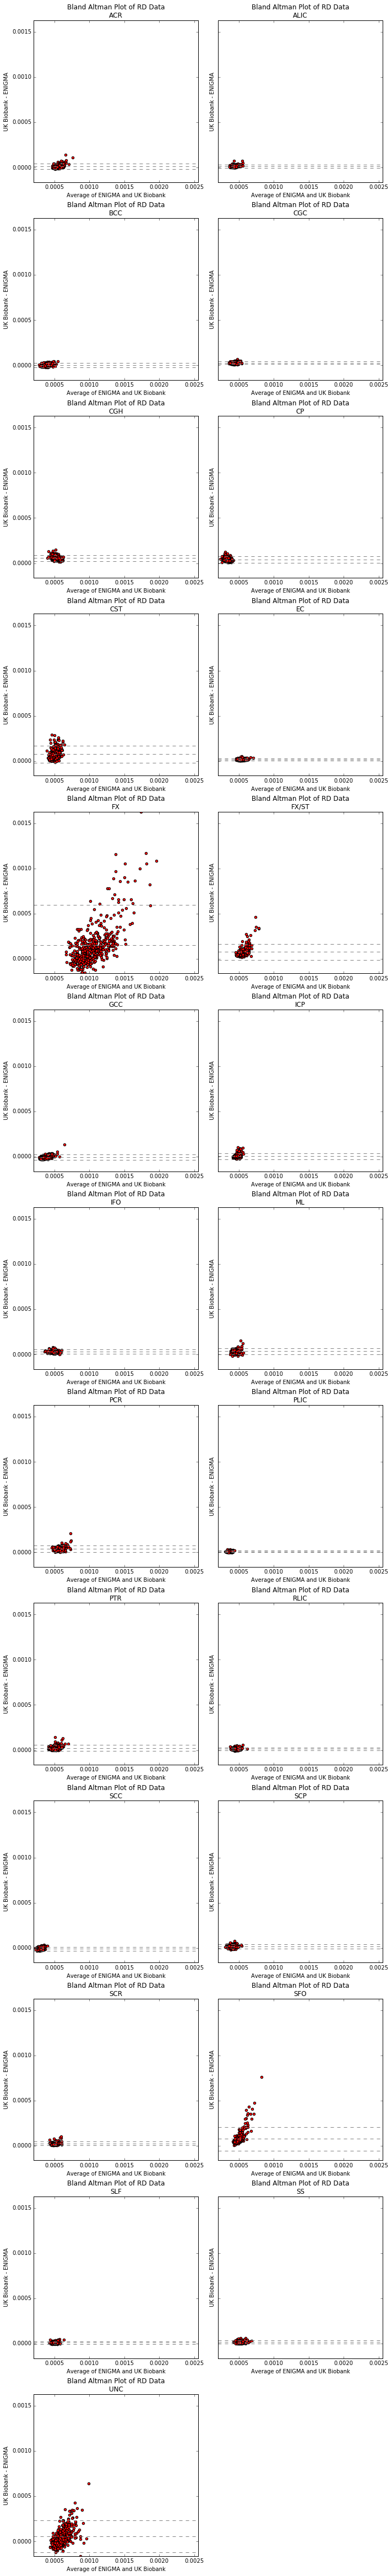

In [20]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "rd"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])
lwrybnds = []
uprybnds = []

fig, axes = plt.subplots(nrows, 2, sharey=True, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    baplot, coldiff = bland_altman(combined[m][roi+'_ukbb'], combined[m][roi+'_enigma'], 
                                   ax[i], color='red', edgecolor='black')
    ax[i].set_xlim([lwrbnd, uprbnd])
    lwrybnds.append(np.amin(coldiff))
    uprybnds.append(np.amax(coldiff))
    ax[i].set_ylabel('UK Biobank - ENIGMA')
    ax[i].set_xlabel('Average of ENIGMA and UK Biobank')
    ax[i].set_title('Bland Altman Plot of %s Data\n%s' %(m.upper(), roi))

for a in ax:
    a.set_ylim([np.amin(lwrybnds), np.amax(uprybnds)])
    
if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()
plt.close(fig)

#### ICVF <a class="anchor" name="baicvf"></a>

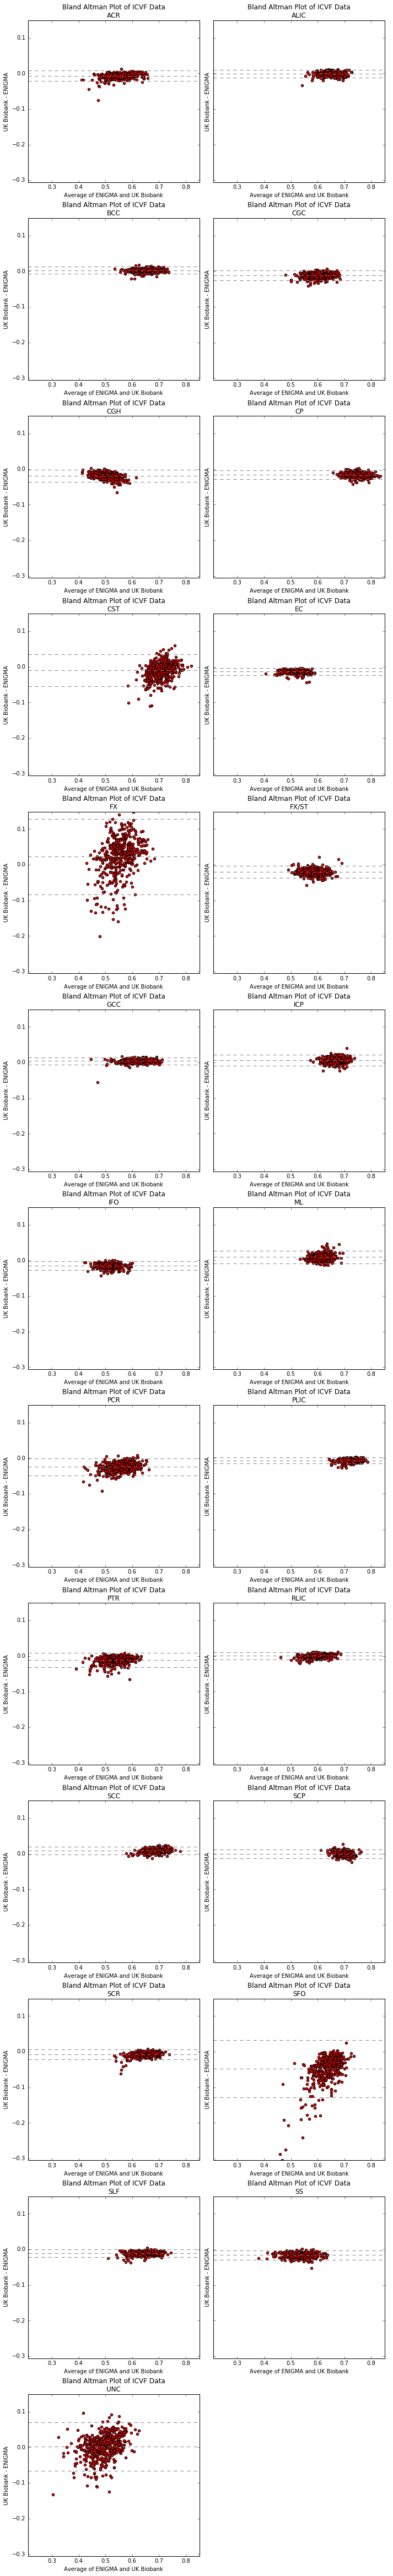

In [21]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "icvf"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])
lwrybnds = []
uprybnds = []

fig, axes = plt.subplots(nrows, 2, sharey=True, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    baplot, coldiff = bland_altman(combined[m][roi+'_ukbb'], combined[m][roi+'_enigma'], 
                                   ax[i], color='red', edgecolor='black')
    ax[i].set_xlim([lwrbnd, uprbnd])
    lwrybnds.append(np.amin(coldiff))
    uprybnds.append(np.amax(coldiff))
    ax[i].set_ylabel('UK Biobank - ENIGMA')
    ax[i].set_xlabel('Average of ENIGMA and UK Biobank')
    ax[i].set_title('Bland Altman Plot of %s Data\n%s' %(m.upper(), roi))

for a in ax:
    a.set_ylim([np.amin(lwrybnds), np.amax(uprybnds)])
    
if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()
plt.close(fig)

#### ISOVF <a class="anchor" name="baisovf"></a>

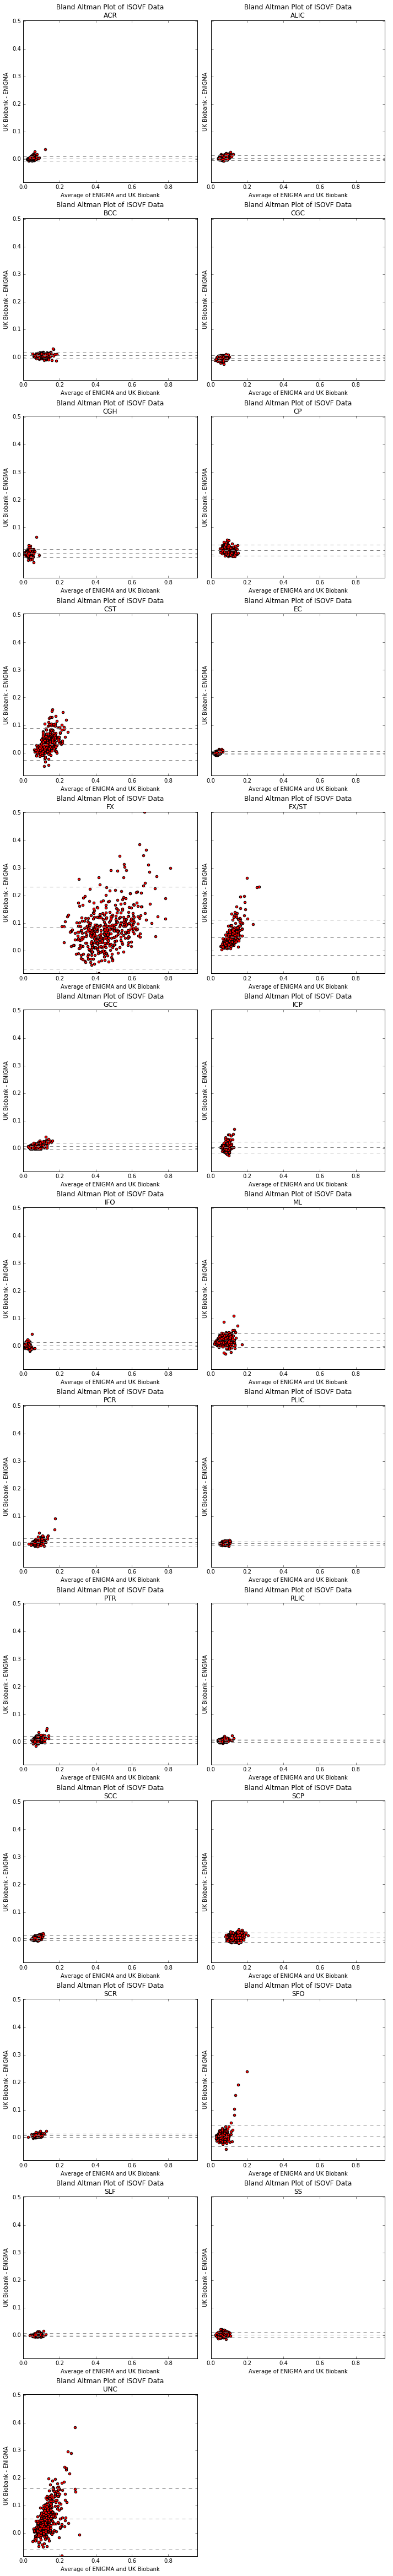

In [22]:
if len(rs_df) % 2 == 0:
    nrows = len(rs_df)/2
else:
    nrows = int(len(rs_df)/2.0) + 1
    
m = "isovf"
lwrbnd = np.amin(np.amin(combined[m]))
uprbnd = np.amax(np.amax(combined[m])[1:])
lwrybnds = []
uprybnds = []

fig, axes = plt.subplots(nrows, 2, sharey=True, figsize=(10,nrows*5))
ax = axes.flatten()

for i, roi in enumerate(rs_df.index):
    baplot, coldiff = bland_altman(combined[m][roi+'_ukbb'], combined[m][roi+'_enigma'], 
                                   ax[i], color='red', edgecolor='black')
    ax[i].set_xlim([lwrbnd, uprbnd])
    lwrybnds.append(np.amin(coldiff))
    uprybnds.append(np.amax(coldiff))
    ax[i].set_ylabel('UK Biobank - ENIGMA')
    ax[i].set_xlabel('Average of ENIGMA and UK Biobank')
    ax[i].set_title('Bland Altman Plot of %s Data\n%s' %(m.upper(), roi))

for a in ax:
    a.set_ylim([np.amin(lwrybnds), np.amax(uprybnds)])
    
if len(rs_df) % 2 != 0:
    ax[-1].axis('off')
    
plt.tight_layout()
plt.show()
plt.close(fig)